In [ ]:
%pip install transformers
%pip install underthesea

In [ ]:
import pandas as pd
import transformers
import matplotlib.pyplot as plt
import re
import numpy as np
import underthesea
from underthesea import word_tokenize
import tensorflow as tf
import matplotlib.pyplot as plt


### Text preprocess

In [ ]:
## lower case + delete spaces

def nornamlize_text(text):
    if text.startswith("http"):
        return "<link spam> " + text + " <link spam>"
    text = re.sub(r'\n',' ', text)    
    text = re.sub(r'[^\w\s]+',' ', text)    
    text = re.sub(r'\s+',' ', text)
    text = text.lower().strip()
    return text

In [ ]:
## unicode convert
def _load_dicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

dicchar = _load_dicchar()
 
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
 

In [ ]:
#https://github.com/stopwords/vietnamese-stopwords
def _load_stopwords():
    sw = []
    with open("/content/drive/MyDrive/vietnamese-stopwords-dash.txt", encoding='utf-8') as f:       
      for line in f:
        line = line.replace("\n","")        
        sw.append(line)
      f.close()
    return sw

stopwords = _load_stopwords()

def remove_stopwords(text):
  text = word_tokenize(text)
  text = [token.replace(' ', '_') for token in text]
  text = [word for word in text if word not in stopwords]
  
  return ' '.join(text)

In [ ]:
def _load_teen_code():
  tc = dict()
  with open("/content/drive/MyDrive/teencode.txt", encoding='utf-8') as f:    
    for line in f:
      line = line.replace("\n","")
      key, val = line.split('\t')
      tc[key] = val
    f.close()
  return tc

teen_code = _load_teen_code()

In [ ]:
def teen_code_convert(text):
  res = ''
  for word in text.split():
    try:
      word = re.sub(" ", "_", teen_code[word])      
    except:
      None
    finally:
      res +=  word+ ' '
  return res

In [ ]:
def text_clean(text):

  text = covert_unicode(text)
  text = nornamlize_text(text)
  
  text = teen_code_convert(text)
  text = remove_stopwords(text)
  return text.strip()

#### Load data and clean

In [ ]:
df_data = pd.read_excel('/content/drive/MyDrive/train.xlsx')
df_data

,Comment,Label
0,k sd đc k nên mua nha,0
1,Đúng như ảnh,3
2,Tai nghe âm lượng nhỏ. Đeo lâu vẫn có cảm giác...,0
3,"Mua sẳn phẩm về khá thất vọng, làm hết cách cá...",0
4,"dùng được 1 tuần thì hỏng , chán chả buồn bảo ...",0
...,...,...
15824,"gửi từ hcm ra hn mà có 2 hôm, sáng nay đã nhận...",4
15825,Tạm ổn Chất lượng về dịch vụ giao hàng không c...,2
15826,Chính sách hỗ trợ rất tệ Mua máy về dùng được ...,0
15827,minh đa đuoc bao hanh chua lam cach nao đê biet\n,2


In [ ]:
df_data['Comment'] = df_data['Comment'].apply(text_clean)

In [ ]:
def label_convert(label):
  if label == 0:
    return '1 sao'
  if label == 1:
    return '2 sao'
  if label == 2:
    return '3 sao'
  if label == 3:
    return '4 sao'
  if label == 4:
    return '5 sao'


df_data['Label_txt'] = df_data['Label'].apply(label_convert)

In [ ]:
df_data

,Comment,Label,Label_txt
0,không được không mua nha,0,1 sao
1,như ảnh,3,4 sao
2,tai nghe âm_lượng nhỏ đeo vẫn cảm_giác đau vàn...,0,1 sao
3,mua sẳn phẩm về khá thất_vọng hết_cách không_t...,0,1 sao
4,dùng được 1 tuần hỏng chán chả buồn bảo_hành,0,1 sao
...,...,...,...
15824,gửi Hồ_Chí_Minh Hà_Nội 2 hôm nhận được hàng,4,5 sao
15825,tạm ổn chất_lượng về dịch_vụ giao hàng_không b...,2,3 sao
15826,chính_sách hỗ_trợ rất tệ mua máy về dùng được ...,0,1 sao
15827,minh đa đuoc bao hanh chua lam cach nao đê,2,3 sao


#### Visualization

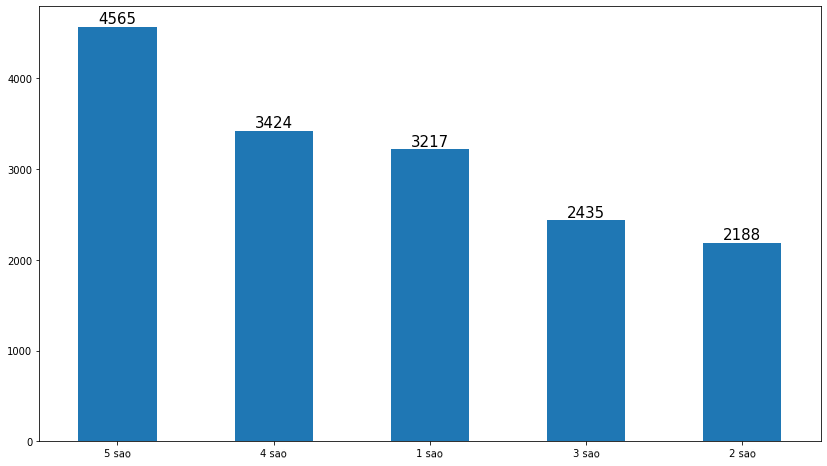

In [ ]:
ax = df_data['Label_txt'].value_counts().plot(kind='bar',  figsize=(14, 8) ,rot=-1)
for bar in ax.patches:    
    ax.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

### Word to id

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", cls_token= '[CLS]', sep_token = '[SEP]')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def word_vectorlizer(text):
    
    tmp = tokenizer.encode_plus(text, padding= 'max_length', max_length = 200, truncation=True)
    
    return tmp['input_ids'], tmp['attention_mask']

#### Over sampling

In [ ]:
# Over sampling

highest_class_len = len(df_data[df_data['Label_txt']== '5 sao'])

for i in range(0, 4):
    num = highest_class_len -len(df_data[df_data['Label_txt']== "{} sao".format(i+1)])
    tmp = df_data[df_data['Label_txt']== "{} sao".format(i+1)].sample(num, replace= True)
    df_data = df_data.append(tmp)

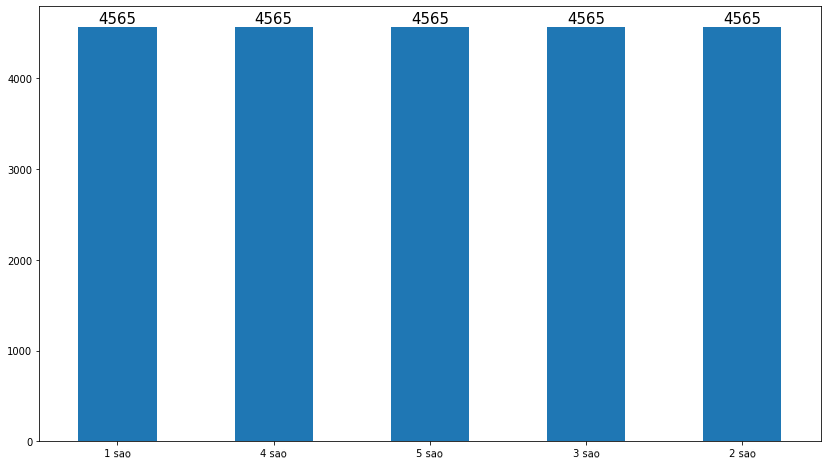

In [ ]:
ax = df_data['Label_txt'].value_counts().plot(kind='bar',  figsize=(14, 8) ,rot=-1)
for bar in ax.patches:    
    ax.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
Xids = np.zeros((len(df_data), 200), dtype= 'int64')
Xmask = np.zeros((len(df_data), 200), dtype= 'int64')

for i, sentence in enumerate(df_data['Comment']):
    Xids[i, :], Xmask[i, :] = word_vectorlizer(sentence)


In [ ]:
tokenizer.decode(Xids[60])

'[CLS] săn sale black friday mua được giá hợp_lý tiki now ship rất nhanh tầm 1 nhận được sản_phẩm mua sản_phẩm online giá_trị tiền cao hơi lo tiki bảo_mật khâu vận_chuyển khá tốt sản_phẩm dùng chưa được dùng ổn hàng hãng [SEP] <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

In [ ]:
labels = tf.keras.utils.to_categorical(df_data.Label)
labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [ ]:
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [ ]:
dataset = dataset.map(map_func)
dataset = dataset.shuffle(len(Xids)).batch(16)

In [ ]:
DS_LEN = len(list(dataset))

train = dataset.take(round(DS_LEN* 0.8))
val = dataset.skip(round(DS_LEN* 0.8))

### Model building

In [ ]:
callbacks = [
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience= 8, verbose=1),
             tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss', factor=0.1, patience= 3, verbose=1, min_delta=0.001),
             tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/checkpoints/phobert_LSTM/cp.ckpt', save_best_only=False, save_weights_only= True, save_freq='epoch', period = 10)
]

In [ ]:
from transformers import TFAutoModel
import tensorflow as tf 

bert = TFAutoModel.from_pretrained("vinai/phobert-base",)
bert.resize_token_embeddings(len(tokenizer)) 

input_ids = tf.keras.layers.Input(shape=(200,), name='input_ids', dtype='int64')
mask = tf.keras.layers.Input(shape=(200,), name='attention_mask', dtype='int64')


embeddings = bert(input_ids = input_ids, attention_mask= mask)[0]  # (last hidden state)

X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256))(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dropout(0.1)(X)

X = tf.keras.layers.Dense(256, activation='relu')(X)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dropout(0.1)(X)

X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dropout(0.1)(X)

y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(X)


Downloading:   0%|          | 0.00/706M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
# model.layers[2].trainable = False

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate= 3e-5, epsilon=1e-8)
metrics=[
         tf.keras.metrics.CategoricalAccuracy(name='accuracy'), 
         tf.keras.metrics.Recall(),
         tf.keras.metrics.Precision(),         
         ]


model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 200)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  134999808  ['input_ids[0][0]',              
 el)                            thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 200,                                           

In [ ]:
history = model.fit(train, 
                    validation_data= val, 
                    epochs= 100, 
                    callbacks= callbacks
                    )

Epoch 1/100
1114/1114 [==============================] - 559s 501ms/step - loss: 0.7263 - accuracy: 0.7209 - recall: 0.6721 - precision: 0.7545 - val_loss: 0.5732 - val_accuracy: 0.7768 - val_recall: 0.7225 - val_precision: 0.8189 - lr: 3.0000e-05
Epoch 2/100
1114/1114 [==============================] - 552s 495ms/step - loss: 0.6166 - accuracy: 0.7761 - recall: 0.7438 - precision: 0.8026 - val_loss: 0.4380 - val_accuracy: 0.8390 - val_recall: 0.8221 - val_precision: 0.8485 - lr: 3.0000e-05
Epoch 3/100
1114/1114 [==============================] - 551s 494ms/step - loss: 0.5250 - accuracy: 0.8139 - recall: 0.7901 - precision: 0.8341 - val_loss: 0.5302 - val_accuracy: 0.8005 - val_recall: 0.7622 - val_precision: 0.8208 - lr: 3.0000e-05
Epoch 4/100
1114/1114 [==============================] - 551s 494ms/step - loss: 0.4311 - accuracy: 0.8489 - recall: 0.8322 - precision: 0.8641 - val_loss: 0.3399 - val_accuracy: 0.8751 - val_recall: 0.8679 - val_precision: 0.8838 - lr: 3.0000e-05
Epoch 5/

### Result graph

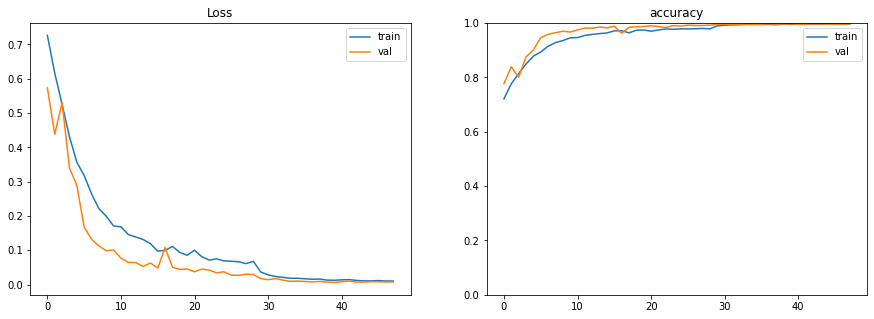

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Loss')
ax[0].plot(history.history['loss'], label= 'train')
ax[0].plot(history.history['val_loss'], label= 'val')
ax[0].legend()

ax[1].set_title('accuracy')
ax[1].plot(history.history['accuracy'], label= 'train')
ax[1].plot(history.history['val_accuracy'], label= 'val')
ax[1].set_ylim([0,1])
ax[1].legend()

### Evaluate

#### Load test set

In [ ]:
test_df = pd.read_excel('/content/drive/MyDrive/test.xlsx')
test_df

,Comment,Label
0,máy bị hư pin hay gì đó pin Sài được 30% pin đ...,0
1,Tiki giao hàng nhanh hơn hẳn so với các trang ...,3
2,hàng điện tử mà không bọc chống sốc. tem bh dá...,1
3,Case đẹp. Nhưng bị hỏng 1 cổng usb. Mà mình th...,0
4,"Màu hồng là màu mình thích, nên khi nhận được ...",4
...,...,...
3869,"ôi trông siêu đẹp luôn í,cứng cáp thích thật đ...",4
3870,"Giao hàng nhanh. Sản phẩm rất đẹp, mỏng, nhẹ. ...",2
3871,Thiết kế ok Tốc độ phản hồi khá ấn tượng Kết n...,3
3872,Sao chuột dùng đơ thế nhỉ? Mình di không đc lu...,1


In [ ]:
test_df.Comment = test_df.Comment.apply(text_clean)
test_df

,Comment,Label
0,máy hư pin hay pin sài được 30 pin tắt nguồn s...,0
1,tiki giao hàng nhanh hẳn trang khác hẹn 7 5 nh...,3
2,hàng điện_tử không bọc chống sốc tem bh dán 1 ...,1
3,case đẹp hỏng 1 cổng usb dùng nhiều 2 cổng bất...,0
4,màu hồng màu thích nhận được sản_phẩm mới_tinh...,4
...,...,...
3869,ôi trông siêu đẹp í cứng_cáp thích đấy,4
3870,giao hàng nhanh sản_phẩm rất đẹp mỏng nhẹ tiếc...,2
3871,thiết_kế ok tốc_độ phản_hồi khá ấn_tượng kết_n...,3
3872,sao chuột dùng đơ di không được,1


In [ ]:
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [ ]:
Xids = np.zeros((len(test_df), 200), dtype= 'int64')
Xmask = np.zeros((len(test_df), 200), dtype= 'int64')

for i, sentence in enumerate(test_df['Comment']):
  Xids[i, :], Xmask[i, :] = word_vectorlizer(sentence)

labels = tf.keras.utils.to_categorical(test_df['Label'])
test_dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.batch(32)

In [ ]:
latest = tf.train.latest_checkpoint('/content/drive/MyDrive/checkpoints/phobert_LSTM')
model.load_weights(latest)

In [ ]:
model.evaluate(test_dataset)

122/122 [==============================] - 42s 284ms/step - loss: 0.7440 - accuracy: 0.8606 - recall: 0.8593 - precision: 0.8633


[0.7439889907836914,
 0.8606091737747192,
 0.8593185544013977,
 0.8633298873901367]

In [ ]:
pred = model.predict(test_dataset)

In [ ]:
y_pred = [ np.argmax(t) for t in pred ]

In [ ]:
from sklearn.metrics import confusion_matrix
Y_test = test_df['Label'].to_numpy()

cm = confusion_matrix(Y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       794
           1       0.76      0.76      0.76       489
           2       0.71      0.80      0.75       454
           3       0.83      0.83      0.83       766
           4       0.95      0.92      0.93      1371

    accuracy                           0.86      3874
   macro avg       0.83      0.84      0.83      3874
weighted avg       0.86      0.86      0.86      3874



In [ ]:
cm_df = pd.DataFrame(cm, index = ['1 Sao','2 Sao','3 Sao', '4 Sao', '5 Sao'], columns = ['1 Sao','2 Sao','3 Sao', '4 Sao', '5 Sao'])

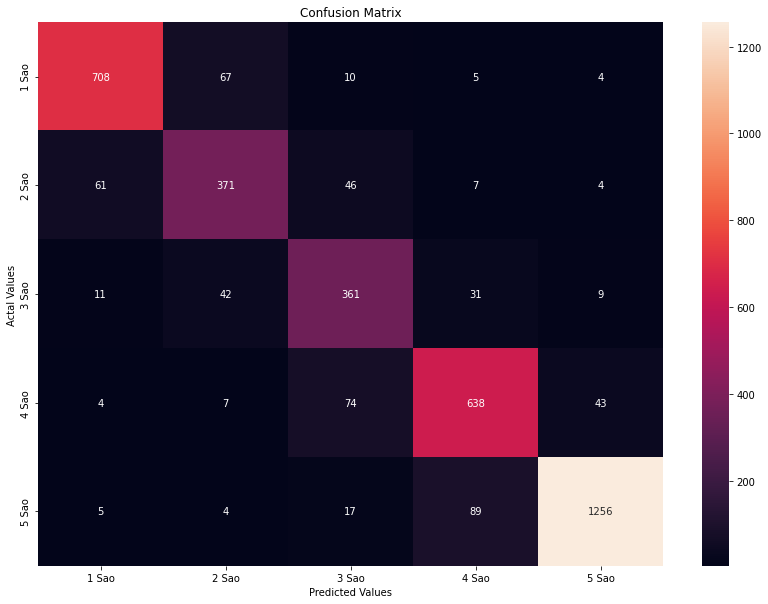

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()